## teleportation

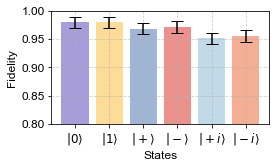

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据

states = [r'$|0\rangle$', r'$|1\rangle$',r'$|+\rangle$', r'$|-\rangle$', r'$|+i\rangle$',r'$|-i\rangle$']
fidelities = [0.9796357, 0.97960156, 0.96833143, 0.97143403, 0.95096088,0.95533963]
errors = [0.01, 0.01, 0.01, 0.01, 0.01,0.01]

# 设置图形大小和字体
plt.figure(figsize=(8/2, 2.5))  # 1/3 A4宽度，高度适当调整
plt.rcParams['font.size'] = 12  # 全局字体大小
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['xtick.labelsize'] = 12  # x轴刻度字体大小
plt.rcParams['ytick.labelsize'] = 12 # y轴刻度字体大小
plt.rcParams['axes.labelsize'] = 12  # 轴标签字体大小
plt.rcParams['axes.titlesize'] = 14  # 标题字体大小

# 绘制柱状图
x_pos = np.arange(len(states))
plt.bar(x_pos, fidelities, yerr=errors, align='center', alpha=0.7, color=['#8074CA', '#FBCE6A', '#7895C1', '#E3625D', '#A8CBDF','#EE8C67'], capsize=6)

# 添加标题和标签
plt.xlabel('States')
plt.ylabel('Fidelity')
plt.xticks(x_pos, states)

# 设置y轴范围
plt.ylim(0.8, 1.0)

# 显示网格
plt.grid(True, linestyle='--', alpha=0.6)

# 调整布局，避免标题和标签被裁剪
plt.tight_layout()

# 保存图形为高分辨率文件
plt.savefig('transmission_fidelity.svg', dpi=600, bbox_inches='tight')
# 显示图形
plt.show()

## 单个address

In [53]:
import pickle
with open("data/classic_addr_2_level_qram_teleportation.pkl",'rb') as file:
    data = pickle.load(file)
data

{'00_0000': {'fidelity': 0.6788769047907718,
  'other_prob': {'reg_RT[0]': 0.10443995963673057,
   'reg_RT[1]': 0.08678102926337034,
   'reg_RDT[0]': 0.12991927346115034,
   'reg_RDT[1]': 0.08678102926337034}},
 '00_0001': {'fidelity': 0.7056507369150141,
  'other_prob': {'reg_RT[0]': 0.11269800051934563,
   'reg_RT[1]': 0.10283043365359647,
   'reg_RDT[0]': 0.13710724487146195,
   'reg_RDT[1]': 0.10283043365359647}},
 '00_0010': {'fidelity': 0.7040434828701858,
  'other_prob': {'reg_RT[0]': 0.1083781706379708,
   'reg_RT[1]': 0.10146041506533436,
   'reg_RDT[0]': 0.12580066615424032,
   'reg_RDT[1]': 0.10146041506533436}},
 '00_0011': {'fidelity': 0.6638831193269722,
  'other_prob': {'reg_RT[0]': 0.12429378531073447,
   'reg_RT[1]': 0.10808155244411692,
   'reg_RDT[0]': 0.13976909850159666,
   'reg_RDT[1]': 0.10808155244411692}},
 '00_0100': {'fidelity': 0.6555057171260693,
  'other_prob': {'reg_RT[0]': 0.11721802552748112,
   'reg_RT[1]': 0.09325345141964053,
   'reg_RDT[0]': 0.13467

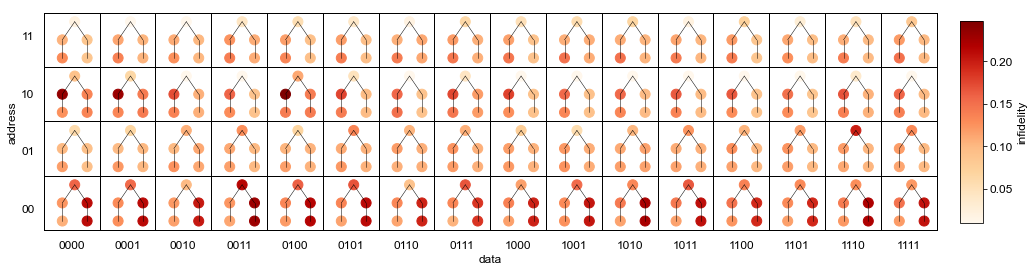

In [56]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np

# 示例数据：m x n 网格，每个格子有一个树，节点值随机生成
node_values = []  # 每个树的节点值（示例：5个节点）

m = 4
n = 16
names = ['router_0','router_1_0','router_1_1','router_1_0D','router_1_1D']
for key in data:
    address,datacell = key.split('_')
    node_values.append([max((1-data[key]['fidelity']*3**(1/3)),0.01),data[key]['other_prob']['reg_RT[0]'],data[key]['other_prob']['reg_RT[1]'],data[key]['other_prob']['reg_RDT[0]'],data[key]['other_prob']['reg_RDT[1]']])
# 确定全局最小值和最大值，用于颜色映射
all_values = np.concatenate(node_values)

vmin, vmax =all_values.min(), all_values.max()

# 创建图形和子图网格
fig, axes = plt.subplots(m, n, figsize=(2*8, 4))  # 将厘米转换为英寸
plt.rcParams['font.size'] = 12  # 设置全局字体大小为 8 pt

# 设置字体和字号
# 设置颜色归一化和颜色图
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.get_cmap('OrRd')  # 使用感知均匀的颜色图

positions = {
    0: (0, 0),      # 根节点
    1: (-1, -1),    # 左子节点
    2: (1, -1),     # 右子节点
    3: (-1, -2),  # 左子节点的左子
    4: (1,-2),  # 左子节点的右子
    # 5: (0.5, -2),   # 右子节点的左子
    # 6: (1.5, -2)    # 右子节点的右子
}
edges = [(0, 1), (0, 2), (1, 3), (2, 4)
        #   (1, 3), (1, 4), (2, 5), (2, 6)
          ]  # 边的连接关系


for i in range(m):
    for j in range(n):
        ax = axes[i, j]
        # 获取当前树的节点值
        values = node_values[i * n + j]
        node_colors = [cmap(norm(val)) for val in values]
        # 绘制树状图
# 绘制边
        for edge in edges:
            x = [positions[edge[0]][0], positions[edge[1]][0]]
            y = [positions[edge[0]][1], positions[edge[1]][1]]
            ax.plot(x, y, color='black', linewidth=0.5)
        
        # 绘制节点
        x_coords = [pos[0] for pos in positions.values()]
        y_coords = [pos[1] for pos in positions.values()]
        ax.scatter(x_coords, y_coords, c=node_colors, s=100, zorder=2)
        # ax.axis('off')
        ax.set_xlim(-2.5, 2)
        ax.set_ylim(-2.5, 0.5)

        ax.set_yticks([])
        ax.set_xticks([])
        for spine in ax.spines.values():
            spine.set_visible(True)  # 确保外边框可见
            spine.set_linewidth(1)   # 设置外边框粗细
            spine.set_color('black') # 设置外边框颜色
# 添加全局坐标轴
# 左侧纵轴（行号）
left_ax = fig.add_axes([0.12, 0.1, 0.0, 0.8])  # [left, bottom, width, height]
left_ax.set_ylim(0, m)
left_ax.set_yticks(np.arange(m) + 0.5)
left_ax.set_yticklabels([bin(x)[2:].zfill(2) for x in range(4)])
left_ax.set_ylabel('address',)
left_ax.tick_params(axis='y', direction='in', length=0)
left_ax.set_xticks([])  # 隐藏 x 轴刻度
left_ax.spines['top'].set_visible(False)
left_ax.spines['left'].set_visible(False)
left_ax.spines['right'].set_visible(False)
left_ax.spines['bottom'].set_visible(False)

# 顶部横轴（列号）
top_ax = fig.add_axes([0.125, 0.1, 0.775, 0.0])  # [left, bottom, width, height]
top_ax.set_xlim(0, n)
top_ax.set_xticks(np.arange(n) + 0.5)
top_ax.set_xticklabels([bin(x)[2:].zfill(4) for x in range(16)])
top_ax.set_xlabel('data')
top_ax.tick_params(axis='x', direction='in', length=0)
top_ax.set_yticks([])  # 隐藏 y 轴刻度
top_ax.spines['top'].set_visible(False)
top_ax.spines['left'].set_visible(False)
top_ax.spines['right'].set_visible(False)
top_ax.spines['bottom'].set_visible(False)

# 添加全局颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('infidelity', fontsize=12)
cbar.ax.tick_params(labelsize=12)
# cbar.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.linspace(0, 21, 5)])

# 调整子图间距
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('figs/router_hotmap.svg', bbox_inches='tight')  # 保存为 PDF 格式
# 保存为 PDF 格式
plt.show()

In [19]:
import pickle
with open("data/max_superposition_addr_2_level_qram_teleportation.pkl",'rb') as file:
    hdata = pickle.load(file)
hdata

{'0001': {'fidelity': 0.4729093867613352},
 '0010': {'fidelity': 0.4707915521755911},
 '0011': {'fidelity': 0.4612711640406894},
 '0100': {'fidelity': 0.4916472401590056},
 '0101': {'fidelity': 0.5001964310936898},
 '0110': {'fidelity': 0.48792603550393415},
 '0111': {'fidelity': 0.5033857941877178},
 '1000': {'fidelity': 0.47209774204378047},
 '1001': {'fidelity': 0.46387503488856213},
 '1010': {'fidelity': 0.514568284098154},
 '1011': {'fidelity': 0.4989711559426584},
 '1100': {'fidelity': 0.4631387497856841},
 '1101': {'fidelity': 0.4946961025620316},
 '1110': {'fidelity': 0.4956366955198515},
 '1111': {'fidelity': 0.4833291254853042},
 '0000': {'fidelity': 0.5156240466426861}}

In [21]:
fidelitydata = []
for key in data:
    fid_dict = {}
    address, datacell = key.split('_')
    fid_dict['address'] = address
    fid_dict['data'] = datacell
    fid_dict['fidelity'] = data[key]['fidelity']
    fidelitydata.append(fid_dict)

for key in hdata:
    fid_dict = {}
    fid_dict['address'] = '++'
    fid_dict['data'] = key
    fid_dict['fidelity'] = hdata[key]['fidelity']
    fidelitydata.append(fid_dict)
import pandas as pd
fidelitydf = pd.DataFrame(fidelitydata)
fidelitydf

,address,data,fidelity
0,00,0000,0.678877
1,00,0001,0.705651
2,00,0010,0.704043
3,00,0011,0.663883
4,00,0100,0.655506
...,...,...,...
75,++,1100,0.463139
76,++,1101,0.494696
77,++,1110,0.495637
78,++,1111,0.483329


C:\Users\quark\AppData\Local\Temp/ipykernel_14132/3897569280.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


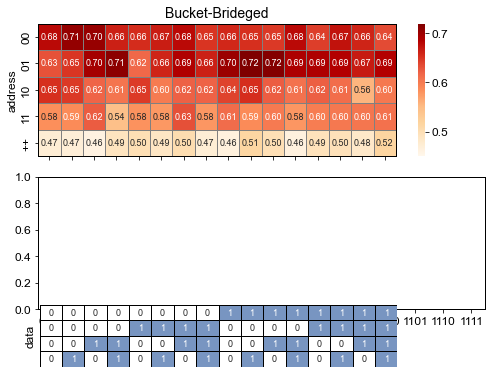

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', [ '#FFF','#7895C1',], N=256)
# 设置字体和字号
plt.rcParams['font.family'] = 'Arial'  # 设置字体为Times New Roman
plt.rcParams['font.size'] = 12  # 设置字号为12

data1 = []
addresses = ['00','01','10','11',"++"]
for address in addresses:
    data1.append(fidelitydf[fidelitydf['address']==address]['fidelity'])
# 生成示例数据
# data = np.random.rand(10, 10)  # 生成一个10x10的随机矩阵

vmin = 0.45
vmax = 0.72

# 创建子图，上下排列
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 4.8),sharex=True)  # 设置图幅大小为8x12英寸

# 绘制第一个热力图
sns.heatmap(data1, annot=True, fmt=".2f", cmap='OrRd',annot_kws={"size": 9},
             cbar=True, ax=axes[0], vmin=vmin, vmax=vmax, linewidths=0.5, linecolor='gray')
axes[0].set_title("Bucket-Brideged", fontsize=14)
# axes[0].set_xlabel("data", fontsize=12)
axes[0].set_yticklabels(addresses,fontsize=12)
axes[0].set_ylabel("address", fontsize=12)
axes[0].set_xticklabels([bin(x)[2:].zfill(4) for x in range(16)],fontsize=12)
# 绘制第二个热力图
for ax in axes:
    for spine in ax.spines.values():
        spine.set_visible(True)  # 确保外边框可见
        spine.set_linewidth(1)   # 设置外边框粗细
        spine.set_color('black') # 设置外边框颜色
# 调整布局
ax3 = plt.axes([0.09, -0.08, 0.710, 0.18])
## draw the bitmaps for 0000 to 1111 with 4 rows and 16 columns
bitmap = np.zeros((4, 16))
for i in range(16):
    for j in range(4):
        bitmap[j, i] = int(bin(i)[2:].zfill(4)[j])
sns.heatmap(bitmap, cmap=cmap, annot=True, fmt=".0f", annot_kws={"size": 9},
            cbar=False, ax=ax3, linewidths=0.5, linecolor='k')


# ax4 = plt.axes([-0.078, 0.5, 0.20, 0.4])
# ## draw the bitmaps for 00 to 11 
# bitmap = np.zeros((4, 2))
# for j in range(2):
#     for i in range(4):
#         bitmap[i,j] = int(bin(i)[2:].zfill(2)[j])
# sns.heatmap(bitmap, cmap=cmap, annot=True, fmt=".0f", annot_kws={"size": 10},
#             cbar=False, ax=ax4, linewidths=0.5, linecolor='k')

ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_ylabel('data')

# ax4.set_xticks([])
# ax4.set_yticks([])

plt.tight_layout()

# 保存图像
plt.savefig("figs/dual_heatmap_unified_cmap.svg", dpi=300, bbox_inches='tight')  # 保存为PNG格式，分辨率为300dpi

# 显示图像
plt.show()

In [4]:
import pandas as pd
import numpy as np
from copy import deepcopy
def list_to_df(data):
    configraw_df = []
    for rowidx,row in enumerate(data):
        new_row = deepcopy(row)
        new_row['data'] = ''.join(row['data'].astype(str))
        try:
            new_row['address'] = ''.join(row['address'].astype(str))
            del new_row['config']
        except:
            pass
        new_row['data_hammingweight'] = np.sum(row['data'])
        
        configraw_df.append(new_row)

    configraw_df = pd.DataFrame(configraw_df)
    return configraw_df

In [194]:
configraw_df = list_to_df(configraw)
configraw_df = configraw_df.groupby(['address','data']).mean()

In [195]:
confisubspace_df = list_to_df(confisubspace)
confisubspace_df = confisubspace_df.groupby(['address','data']).mean()
confisubspace_df

fidelity_init  fidelity_rho  fidelity_router_0  \
address data                                                   
00      0000       0.998001      0.618961           0.882351   
        0001       0.998001      0.616790           0.881587   
        0010       0.998001      0.611810           0.880062   
        0011       0.998001      0.609685           0.879302   
        0100       0.998001      0.611599           0.881587   
...                     ...           ...                ...   
11      1011       0.998001      0.586355           0.877030   
        1100       0.998001      0.596144           0.879302   
        1101       0.998001      0.590640           0.879302   
        1110       0.998001      0.584118           0.877030   
        1111       0.998001      0.592496           0.879302   

              fidelity_router_1_0  fidelity_router_1_1  data_hammingweight  
address data                                                                
00      0000             0.845031             0.856274                 0.0  
        0001             0.844347             0.853647                 1.0  
        0010             0.842993             0.852226                 1.0  
        0011             0.842315             0.849639                 2.0  
        0100             0.844081             0.855556                 1.0  
...                           ...                  ...                 ...  
11      1011             0.827753             0.793164                 3.0  
        1100             0.827801             0.796404                 2.0  
        1101             0.827822             0.796518                 3.0  
        1110             0.825895             0.793036                 3.0  
        1111             0.827854             0.796642                 4.0  

[64 rows x 6 columns]

In [196]:
rows = configraw_df[configraw_df.index.get_level_values('address') == '00']
rows

fidelity_init  fidelity_rho  fidelity_router_0  \
address data                                                   
00      0000       0.998001      0.484603           0.818670   
        0001       0.998001      0.482956           0.818033   
        0010       0.998001      0.479875           0.816762   
        0011       0.998001      0.478279           0.816129   
        0100       0.998001      0.476127           0.818033   
        0101       0.998001      0.475582           0.818033   
        0110       0.998001      0.471373           0.816129   
        0111       0.998001      0.470857           0.816129   
        1000       0.998001      0.471922           0.816762   
        1001       0.998001      0.471352           0.816129   
        1010       0.998001      0.473347           0.816762   
        1011       0.998001      0.469482           0.814236   
        1100       0.998001      0.475006           0.816129   
        1101       0.998001      0.475529           0.816129   
        1110       0.998001      0.473049           0.814236   
        1111       0.998001      0.476948           0.816129   

              fidelity_router_1_0  fidelity_router_1_1  data_hammingweight  
address data                                                                
00      0000             0.770505             0.783987                 0.0  
        0001             0.769964             0.782012                 1.0  
        0010             0.768904             0.780867                 1.0  
        0011             0.768376             0.778878                 2.0  
        0100             0.769632             0.783408                 1.0  
        0101             0.769628             0.782012                 2.0  
        0110             0.768038             0.780295                 2.0  
        0111             0.768034             0.778878                 3.0  
        1000             0.768571             0.782255                 1.0  
        1001             0.768038             0.780295                 2.0  
        1010             0.768567             0.780866                 2.0  
        1011             0.766454             0.777184                 3.0  
        1100             0.767704             0.781680                 2.0  
        1101             0.767696             0.780295                 3.0  
        1110             0.766114             0.778589                 3.0  
        1111             0.767696             0.778878                 4.0

In [197]:
list_to_df(confisubspace)

,address,data,fidelity_init,fidelity_rho,fidelity_router_0,fidelity_router_1_0,fidelity_router_1_1,data_hammingweight
0,10,1010,0.998001,0.594792,0.880062,0.849046,0.856289,2
1,01,1100,0.998001,0.604632,0.879302,0.760292,0.852756,2
2,10,1011,0.998001,0.588683,0.877030,0.846241,0.853178,3
3,11,1101,0.998001,0.590640,0.879302,0.827822,0.796518,3
4,00,0001,0.998001,0.616790,0.881587,0.844347,0.853647,1
...,...,...,...,...,...,...,...,...
635,10,0010,0.998001,0.593800,0.880062,0.850910,0.856289,1
636,11,1001,0.998001,0.590483,0.879302,0.829664,0.796518,2
637,10,0111,0.998001,0.593745,0.879302,0.848326,0.855341,3
638,00,0010,0.998001,0.611810,0.880062,0.842993,0.852226,1


In [198]:
list_to_df(confisubspace).groupby(['address','data_hammingweight'])['fidelity_rho'].mean()

address  data_hammingweight
00       0                     0.618961
         1                     0.612067
         2                     0.607988
         3                     0.602548
         4                     0.606522
01       0                     0.617910
         1                     0.610241
         2                     0.606389
         3                     0.601950
         4                     0.605477
10       0                     0.606910
         1                     0.599030
         2                     0.595016
         3                     0.590466
         4                     0.594725
11       0                     0.604690
         1                     0.598052
         2                     0.592033
         3                     0.588524
         4                     0.592496
Name: fidelity_rho, dtype: float64

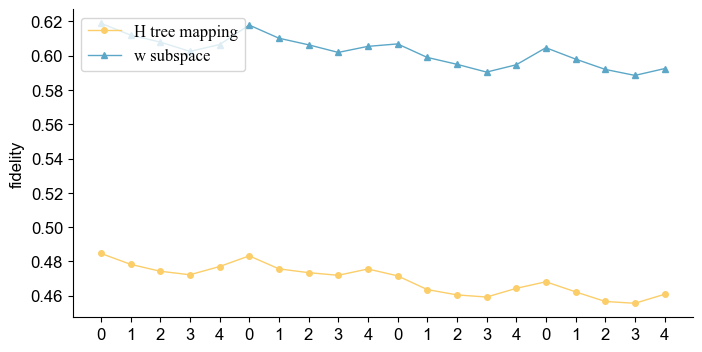

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12  # 设置字号为12
plt.rcParams['mathtext.fontset'] = 'cm'
## set hatch density
plt.rcParams['hatch.linewidth'] = 0.6
plt.rcParams['hatch.color'] = 'black'
plt.rcParams['lines.linewidth'] = 1
## read the data

colors = ['#FBCE6A','#5CA7C7','#383838','#D4352D']
# hatchs = ['xxxx','','','+','//']
data_configspace = list_to_df(confisubspace).groupby(['address','data_hammingweight'])['fidelity_rho'].mean()
data_config = list_to_df(configraw).groupby(['address','data_hammingweight'])['fidelity_rho'].mean()

x = np.arange(len(data_configspace))
markersize = 4
ax.plot(x, data_config, label='H tree mapping', marker='o', markersize=markersize, color=colors[0], linestyle='-')
ax.plot(x, data_configspace, label='w subspace', marker='^', markersize= markersize, color=colors[1], linestyle='-')
# ax.plot(x, data_configspacenol, label='w/o Data Load', marker='s', markersize=markersize, color=colors[2], linestyle='-')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_xlabel('QRAM Level')
ax.set_ylabel('fidelity')
ax.set_xticks(x)
ax.set_xticklabels([x[1] for x in data_configspace.index.values])
# ax.set_yscale('log')
ax.legend(loc='upper left')
## hidden the top and right spines

plt.savefig('two_level_qram_noise_fidelity.svg', bbox_inches='tight')

/tmp/ipykernel_2726189/3911630318.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


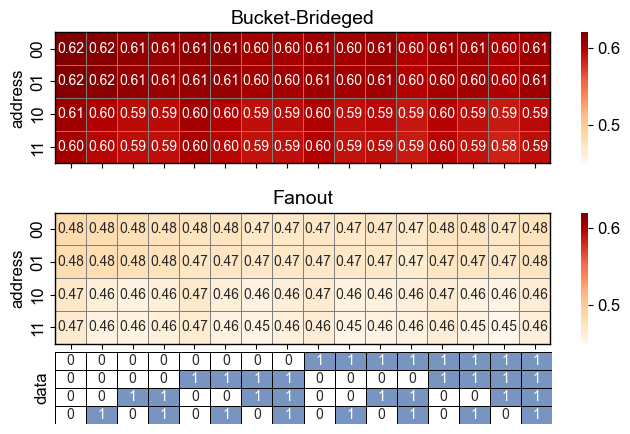

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', [ '#FFF','#7895C1',], N=256)
# 设置字体和字号
plt.rcParams['font.family'] = 'Arial'  # 设置字体为Times New Roman
plt.rcParams['font.size'] = 12  # 设置字号为12

data1 = []
for address in ['00','01','10','11']:
    data1.append(confisubspace_df['fidelity_rho'][confisubspace_df.index.get_level_values('address') == address])
# 生成示例数据
# data = np.random.rand(10, 10)  # 生成一个10x10的随机矩阵


data2 = []
for address in ['00','01','10','11']:
    data2.append(configraw_df['fidelity_rho'][configraw_df.index.get_level_values('address') == address])
# 生成示例数据

vmin = 0.45
vmax = 0.62

# 创建子图，上下排列
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 4),sharex=True)  # 设置图幅大小为8x12英寸

# 绘制第一个热力图
sns.heatmap(data1, annot=True, fmt=".2f", cmap='OrRd',annot_kws={"size": 10},
             cbar=True, ax=axes[0], vmin=vmin, vmax=vmax, linewidths=0.5, linecolor='gray')
axes[0].set_title("Bucket-Brideged", fontsize=14)
# axes[0].set_xlabel("data", fontsize=12)
axes[0].set_yticklabels(['00','01','10','11'],fontsize=12)
axes[0].set_ylabel("address", fontsize=12)
axes[0].set_xticklabels([bin(x)[2:].zfill(4) for x in range(16)],fontsize=12)
# 绘制第二个热力图
sns.heatmap(data2, annot=True, fmt=".2f", cmap='OrRd',annot_kws={"size": 10},
             cbar=True, ax=axes[1], vmin=vmin, vmax=vmax,linewidths=0.5, linecolor='gray')
axes[1].set_title("Fanout", fontsize=14)
axes[1].set_xlabel("data", fontsize=12)
axes[1].set_yticklabels(['00','01','10','11'],fontsize=12)
# axes[1].set_xticklabels([bin(x)[2:].zfill(4) for x in range(16)],fontsize=12)
axes[1].set_xticklabels([],fontsize=12)
axes[1].set_ylabel("address", fontsize=12)
for ax in axes:
    for spine in ax.spines.values():
        spine.set_visible(True)  # 确保外边框可见
        spine.set_linewidth(1)   # 设置外边框粗细
        spine.set_color('black') # 设置外边框颜色
# 调整布局
ax3 = plt.axes([0.09, -0.08, 0.710, 0.18])
## draw the bitmaps for 0000 to 1111 with 4 rows and 16 columns
bitmap = np.zeros((4, 16))
for i in range(16):
    for j in range(4):
        bitmap[j, i] = int(bin(i)[2:].zfill(4)[j])
sns.heatmap(bitmap, cmap=cmap, annot=True, fmt=".0f", annot_kws={"size": 10},
            cbar=False, ax=ax3, linewidths=0.5, linecolor='k')


# ax4 = plt.axes([-0.078, 0.5, 0.20, 0.4])
# ## draw the bitmaps for 00 to 11 
# bitmap = np.zeros((4, 2))
# for j in range(2):
#     for i in range(4):
#         bitmap[i,j] = int(bin(i)[2:].zfill(2)[j])
# sns.heatmap(bitmap, cmap=cmap, annot=True, fmt=".0f", annot_kws={"size": 10},
#             cbar=False, ax=ax4, linewidths=0.5, linecolor='k')

ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_ylabel('data')

# ax4.set_xticks([])
# ax4.set_yticks([])

plt.tight_layout()

# 保存图像
plt.savefig("figs/dual_heatmap_unified_cmap.svg", dpi=300, bbox_inches='tight')  # 保存为PNG格式，分辨率为300dpi

# 显示图像
plt.show()

## router 的激发热图

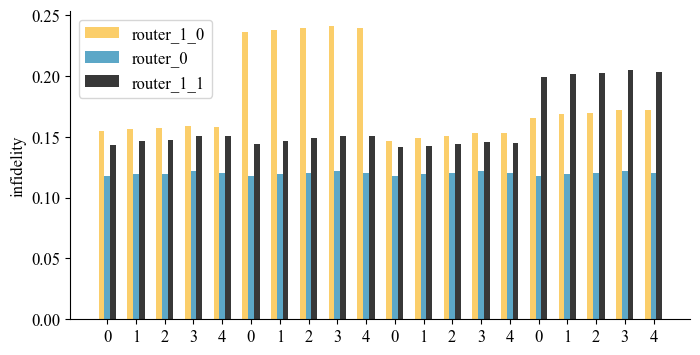

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.family'] = 'Times New Roman'  # 设置字体为Times New Roman
plt.rcParams['font.size'] = 12  # 设置字号为12
# plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
## set hatch density
plt.rcParams['hatch.linewidth'] = 0.6
plt.rcParams['hatch.color'] = 'black'
plt.rcParams['lines.linewidth'] = 1
## read the data

colors = ['#FBCE6A','#5CA7C7','#383838','#D4352D']
# hatchs = ['xxxx','','','+','//']
data = {}
names = ['router_1_0','router_0','router_1_1']
for name in names:
    data[name]= list_to_df(confisubspace).groupby(['address','data_hammingweight'])[f'fidelity_{name}'].mean()
# data_config = list_to_df(configraw).groupby(['address','data_hammingweight'])['fidelity_rho'].mean()

x = np.arange(len(data_configspace))
markersize = 4
idx = 0
for name in names:
    # ax.plot(x, data[name], label=name, marker='^', markersize=markersize, color=colors[idx], linestyle='-')
    ax.bar(x-0.2+idx*0.2, 1-data[name],width=0.2, label=name, color=colors[idx], linestyle='-')
    idx+=1
# ax.plot(x, data_configspacenol, label='w/o Data Load', marker='s', markersize=markersize, color=colors[2], linestyle='-')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_xlabel('QRAM Level')
ax.set_ylabel('infidelity')
ax.set_xticks(x)
ax.set_xticklabels([x[1] for x in data[name].index.values])
# ax.set_yscale('log')
ax.legend(loc='upper left')
## hidden the top and right spines

plt.savefig('two_level_qram_router_fidelity.svg', bbox_inches='tight')

In [140]:
list_to_df(confisubspace).groupby(['address','data'])[f'fidelity_rho'].mean()

address  data
00       0000    0.618961
         0001    0.616790
         0010    0.611810
         0011    0.609685
         0100    0.611599
                   ...   
11       1011    0.586355
         1100    0.596144
         1101    0.590640
         1110    0.584118
         1111    0.592496
Name: fidelity_rho, Length: 64, dtype: float64

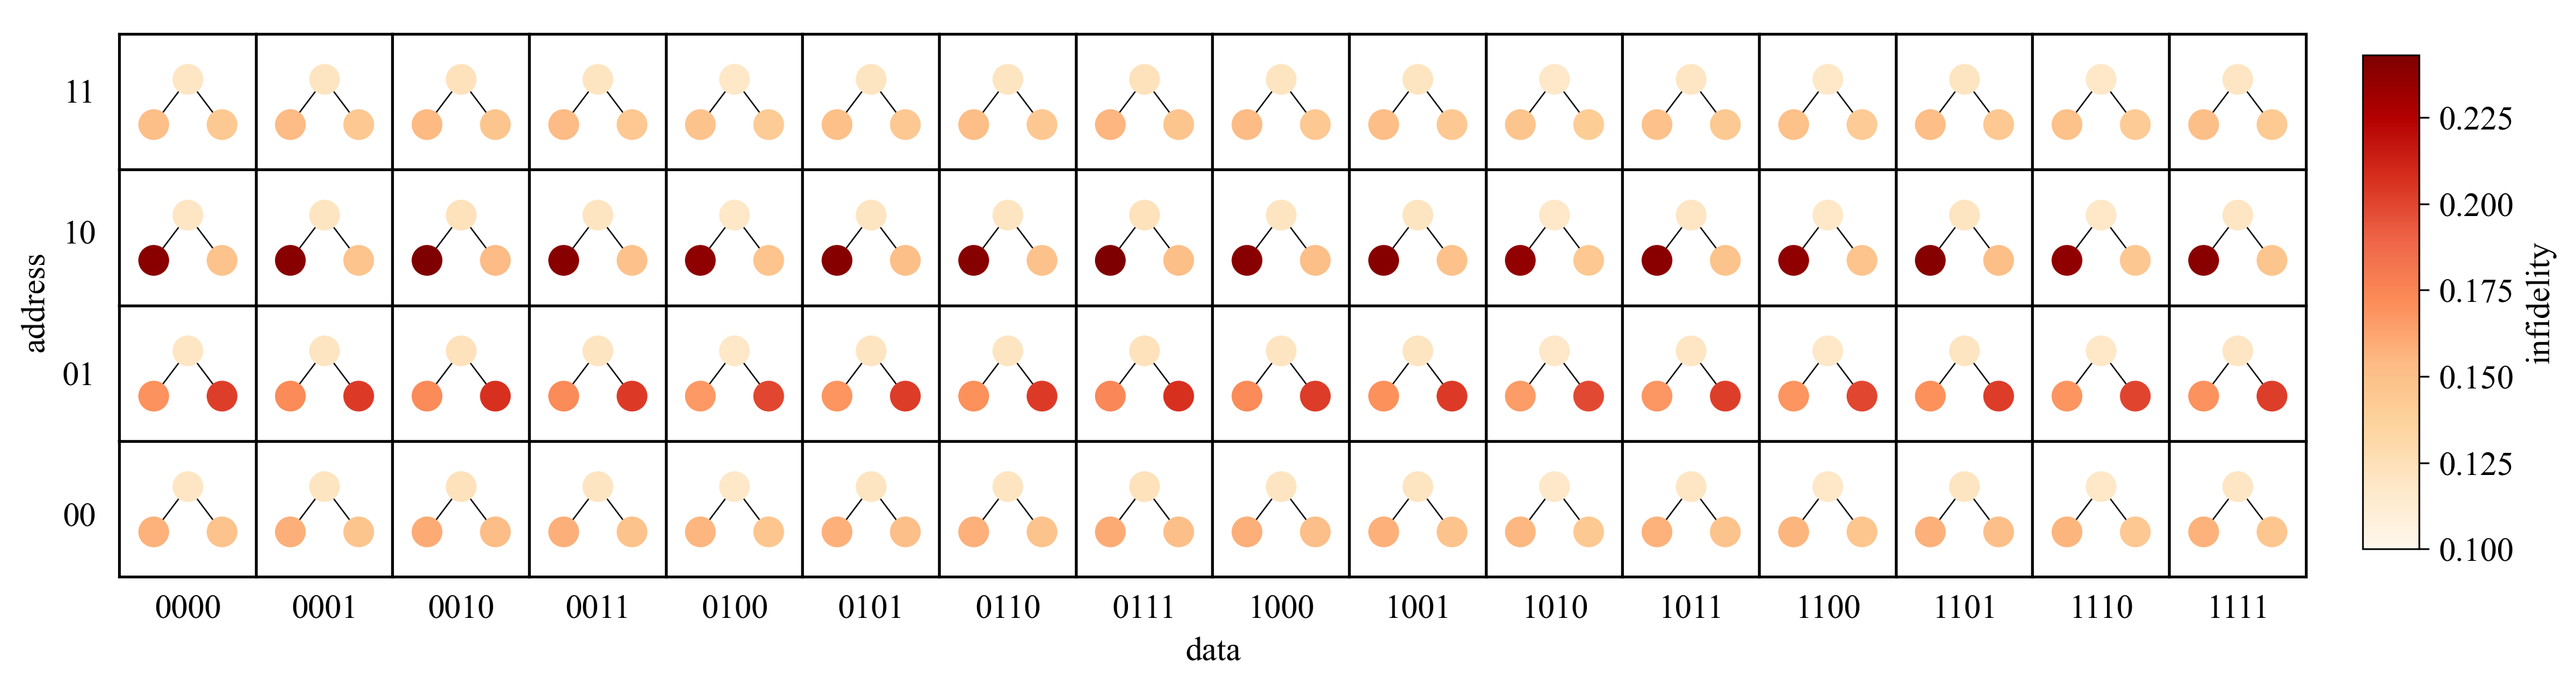

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from matplotlib.colors import Normalize
import numpy as np

# 示例数据：m x n 网格，每个格子有一个树，节点值随机生成
node_values = []  # 每个树的节点值（示例：5个节点）
confisubspace_df = list_to_df(confisubspace)
m = len(confisubspace_df['address'].unique())
n = len(confisubspace_df['data'].unique())
names = ['router_0','router_1_0','router_1_1']
for address in confisubspace_df['address'].unique():
    for data in confisubspace_df['data'].unique():
        fids = []
        for name in names:
            fidelity = confisubspace_df[(confisubspace_df['address']==address) & (confisubspace_df['data']==data)][f'fidelity_{name}'].mean()
            fids.append(1-fidelity)
        node_values.append(fids)
# 确定全局最小值和最大值，用于颜色映射
all_values = np.concatenate(node_values)
vmin, vmax = 0.1, all_values.max()

# 创建图形和子图网格
fig, axes = plt.subplots(m, n, figsize=(2*17.8 / 2.54, 1/2* 17.8 / 2.54))  # 将厘米转换为英寸
plt.rcParams['font.size'] = 12  # 设置全局字体大小为 8 pt

# 设置字体和字号
# 设置颜色归一化和颜色图
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.get_cmap('OrRd')  # 使用感知均匀的颜色图

positions = {
    0: (0, 0),      # 根节点
    1: (-1, -1),    # 左子节点
    2: (1, -1),     # 右子节点
    # 3: (-1.5, -2),  # 左子节点的左子
    # 4: (-0.5, -2),  # 左子节点的右子
    # 5: (0.5, -2),   # 右子节点的左子
    # 6: (1.5, -2)    # 右子节点的右子
}
edges = [(0, 1), (0, 2),
        #   (1, 3), (1, 4), (2, 5), (2, 6)
          ]  # 边的连接关系


for i in range(m):
    for j in range(n):
        ax = axes[i, j]
        # 获取当前树的节点值
        values = node_values[i * n + j]
        node_colors = [cmap(norm(val)) for val in values]
        # 绘制树状图
# 绘制边
        for edge in edges:
            x = [positions[edge[0]][0], positions[edge[1]][0]]
            y = [positions[edge[0]][1], positions[edge[1]][1]]
            ax.plot(x, y, color='black', linewidth=0.5)
        
        # 绘制节点
        x_coords = [pos[0] for pos in positions.values()]
        y_coords = [pos[1] for pos in positions.values()]
        ax.scatter(x_coords, y_coords, c=node_colors, s=100, zorder=2)
        # ax.axis('off')
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 1)

        ax.set_yticks([])
        ax.set_xticks([])
        for spine in ax.spines.values():
            spine.set_visible(True)  # 确保外边框可见
            spine.set_linewidth(1)   # 设置外边框粗细
            spine.set_color('black') # 设置外边框颜色
# 添加全局坐标轴
# 左侧纵轴（行号）
left_ax = fig.add_axes([0.12, 0.1, 0.0, 0.8])  # [left, bottom, width, height]
left_ax.set_ylim(0, m)
left_ax.set_yticks(np.arange(m) + 0.5)
left_ax.set_yticklabels([bin(x)[2:].zfill(2) for x in range(4)])
left_ax.set_ylabel('address',)
left_ax.tick_params(axis='y', direction='in', length=0)
left_ax.set_xticks([])  # 隐藏 x 轴刻度
left_ax.spines['top'].set_visible(False)
left_ax.spines['left'].set_visible(False)
left_ax.spines['right'].set_visible(False)
left_ax.spines['bottom'].set_visible(False)

# 顶部横轴（列号）
top_ax = fig.add_axes([0.125, 0.1, 0.775, 0.0])  # [left, bottom, width, height]
top_ax.set_xlim(0, n)
top_ax.set_xticks(np.arange(n) + 0.5)
top_ax.set_xticklabels([bin(x)[2:].zfill(4) for x in range(16)])
top_ax.set_xlabel('data')
top_ax.tick_params(axis='x', direction='in', length=0)
top_ax.set_yticks([])  # 隐藏 y 轴刻度
top_ax.spines['top'].set_visible(False)
top_ax.spines['left'].set_visible(False)
top_ax.spines['right'].set_visible(False)
top_ax.spines['bottom'].set_visible(False)

# 添加全局颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('infidelity', fontsize=12)

# 调整子图间距
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('figs/router_hotmap.pdf', bbox_inches='tight')  # 保存为 PDF 格式
# 保存为 PDF 格式
plt.show()

## GHZ 态

In [12]:
import pickle
with open("data/ghz_addr_2_level_qram_teleportation.pkl",'rb') as file:
    ghzdata = pickle.load(file)
ghzdata

{'fidelity': 0.5485049574746959,
 'rho': Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
 Qobj data =
 [[ 3.78074259e-01+0.00000000e+00j  1.61934346e-02-2.67095529e-02j
   -2.20360747e-03+1.14898300e-02j -7.88943935e-03+1.17391692e-02j
    1.21883471e-02-7.37540377e-03j  1.17252618e-02+7.91921839e-03j
   -9.06780921e-03-7.60521879e-03j  1.81207851e-01+1.05911911e-01j]
  [ 1.61934346e-02+2.67095547e-02j  9.28720981e-02+1.37729916e-09j
    5.71384933e-03-3.97624075e-03j -7.30255106e-03+5.46186650e-03j
    2.59002019e-03-3.10728152e-04j  1.30595453e-03+1.86618709e-03j
   -9.32776742e-03+4.60305950e-03j -1.62970647e-02+2.60780528e-02j]
  [-2.20360747e-03-1.14898300e-02j  5.71384886e-03+3.97624262e-03j
    4.28504050e-02+2.97164904e-10j  3.99947539e-03-2.18550023e-03j
    6.07586885e-03+1.53883884e-03j  5.64639643e-03+3.76261026e-03j
    2.98317242e-03+4.27323510e-04j -2.30008806e-03+5.72939462e-04j]
  [-7.88943842e-03-1.17391692e-02j -7.30255153e-

In [ ]:
rho = ghzdata['rho'].data


array([[ 3.78074259e-01+0.00000000e+00j,  1.61934346e-02-2.67095529e-02j,
        -2.20360747e-03+1.14898300e-02j, -7.88943935e-03+1.17391692e-02j,
         1.21883471e-02-7.37540377e-03j,  1.17252618e-02+7.91921839e-03j,
        -9.06780921e-03-7.60521879e-03j,  1.81207851e-01+1.05911911e-01j],
       [ 1.61934346e-02+2.67095547e-02j,  9.28720981e-02+1.37729916e-09j,
         5.71384933e-03-3.97624075e-03j, -7.30255106e-03+5.46186650e-03j,
         2.59002019e-03-3.10728152e-04j,  1.30595453e-03+1.86618709e-03j,
        -9.32776742e-03+4.60305950e-03j, -1.62970647e-02+2.60780528e-02j],
       [-2.20360747e-03-1.14898300e-02j,  5.71384886e-03+3.97624262e-03j,
         4.28504050e-02+2.97164904e-10j,  3.99947539e-03-2.18550023e-03j,
         6.07586885e-03+1.53883884e-03j,  5.64639643e-03+3.76261026e-03j,
         2.98317242e-03+4.27323510e-04j, -2.30008806e-03+5.72939462e-04j],
       [-7.88943842e-03-1.17391692e-02j, -7.30255153e-03-5.46186697e-03j,
         3.99947632e-03+2.18550023e

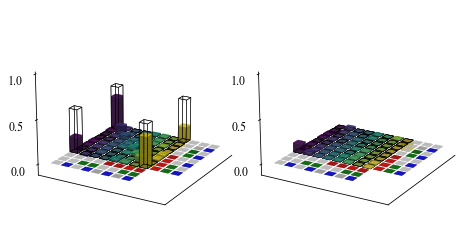

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.family'] = 'Times New Roman'  # 设置字体为Times New Roman
plt.rcParams['font.size'] = 12  # 设置字号为12
# 创建三维图形
fig = plt.figure(figsize=(8, 6))  # 设置图幅大小为10x8英寸

# 生成示例密度矩阵数据
n = 8  # 矩阵大小
density_matrix = rho.toarray()
# 假设 density_matrix_real 和 density_matrix_imag 是8x8的矩阵
density_matrix_real = density_matrix.real
density_matrix_imag = density_matrix.imag

density_matrix = np.zeros((n, n), dtype=complex)
density_matrix[0, 0] = 0.5
density_matrix[0, 7] = 0.5
density_matrix[7, 0] = 0.5
density_matrix[7, 7] = 0.5
# 理想GHZ态的密度矩阵
ideal_ghz_real = density_matrix.real
ideal_ghz_imag =density_matrix.imag
# 设置理想GHZ态的值，例如对角线上的元素

# 创建坐标
x = y = np.arange(8)
x, y = np.meshgrid(x, y)
x, y = x.flatten(), y.flatten()
z_real = density_matrix_real.flatten()
z_imag = density_matrix_imag.flatten()

ideal_ghz_real = ideal_ghz_real.flatten()
ideal_ghz_imag = ideal_ghz_imag.flatten()
# 创建图形
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# 定义颜色映射
colors = plt.cm.viridis(np.linspace(0, 1, 8))  # 使用tab10颜色映射，生成8种颜色

# 绘制实部
# 按Y轴从大到小的顺序绘制，确保Y轴较小的值覆盖较大的值
for j in range(7, -1, -1):  # 从Y轴最大值到最小值
    for i in range(8):
        # 绘制实体框
        ax1.bar3d(x[i*8+j]+0.4, y[i*8+j]+0.4, 0, 0.8, 0.8, z_real[i*8+j], color=colors[i], alpha=0.7)
        ax1.bar3d(x[i*8+j]+0.4, y[i*8+j]+0.4, 0, 0.8, 0.8, ideal_ghz_real[i*8+j], color=colors[i], edgecolor='k', alpha=0,linewidth=0.5)

# 绘制位图
bitmap = np.zeros((3, 8))
n = np.arange(8)
m = np.arange(3)
for i in range(8):
    for j in range(3):
        bitmap[j, i] = int(bin(i)[2:].zfill(3)[j])
x_m, y_n = np.meshgrid(m, n)
x_m, y_n = x_m.flatten(), y_n.flatten()
bits_colors = ['r','g','b']
## draw the bitmaps for 0000 to 1111 with 4 rows and 16 columns

# 按Y轴从大到小的顺序绘制，确保Y轴较小的值覆盖较大的值
for j in range(7, -1, -1):  # 从Y轴最大值到最小值
    for i in range(8):
        # 绘制实体框
        ax2.bar3d(x[i*8+j]+0.4, y[i*8+j]+0.4, 0, 0.8, 0.8, z_imag[i*8+j], color=colors[i], alpha=0.7)
        ax2.bar3d(x[i*8+j]+0.4, y[i*8+j]+0.4, 0, 0.8, 0.8, ideal_ghz_imag[i*8+j], color=colors[i], edgecolor='k', alpha=0,linewidth=0.5)


# 仅保留 z 轴刻度，隐藏 x-z 和 y-z 平面的网格
# 通过调整平面的可见性

# 设置标签
for ax in [ax1, ax2]:
    for j in range(3):  # 从Y轴最大值到最小值
        for i in range(8):
            # 绘制实体框
            if bitmap[j, i]:
                ax.bar3d(x_m[i*3+j]+0.4+8, y_n[i*3+j]+0.4, 0, 0.8, 0.8,0, color=bits_colors[j], alpha=0.7)
                ax.annotate('1', (x_m[i*3+j]+0.4+8, y_n[i*3+j]+0.4), color=bits_colors[j], ha='center', va='center')
            else:
                ax.bar3d(x_m[i*3+j]+0.4+8, y_n[i*3+j]+0.4, 0, 0.8, 0.8,0, color='w', alpha=0.7)

# 保留 z 轴刻度，但关闭 x-y 平面的网格
            
            if bitmap[j, i]:
                ax.bar3d(y_n[i*3+j]+0.4, x_m[i*3+j]+0.4+8, 0, 0.8, 0.8,0, color=bits_colors[j], alpha=0.7)
            else:
                ax.bar3d(y_n[i*3+j]+0.4, x_m[i*3+j]+0.4+8, 0, 0.8, 0.8,0, color='w', alpha=0.7)

    # 保留 z 轴刻度，但关闭 x-y 平面的网格
    ax.grid(False)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # x-z 平面透明
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # y-z 平面透明
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # x-y 平面透明（可选）

    # 只显示 z 轴的刻度线
    ax.set_xticks([])  # 可选：隐藏 x 轴刻度
    ax.set_yticks([])  # 可选：隐藏 y 轴刻度
    ax.set_zticks([0, 0.5, 1])  # 设置 z 轴刻度（根据需要调整）
    # ax.xaxis.line.set_visible(False)  # 隐藏默认轴线
    # ax.yaxis.line.set_visible(False)
    # ax.zaxis.line.set_visible(False)
    # ax.set_xticks(np.arange(8) )
    # ax.set_yticks(np.arange(8) )
    # ax.set_xticklabels(['000', '001', '010', '011', '100', '101', '110', '111'])
    # ax.set_yticklabels(['000', '001', '010', '011', '100', '101', '110', '111'])
    # ax.zaxis.set_rotate_label(False)
    # ax1.plot([0, 0], [0, 0], [-1, 1], color='black', linewidth=1)  # z 轴线
    # z_ticks = [ 0, 0.5, 1]  # z 轴刻度位置
    # for z in z_ticks:
    #     ax1.text(0, -0.1, z, f'{z}', ha='center', va='center')  # 在 z 轴左侧添加刻度标签
    ax.set_zlim(-0.1, 1)  # 设置Z轴范围
    # ax.zaxis.set_ticks_position('lower')
    ax.view_init(elev=20, azim=30)  # 设置视角
# ax1.set_title('real part')
# ax2.set_title('imaginary part')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('figs/noiseGHZstate.svg', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

In [ ]:
from matplotlib import colormaps
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list
plot_color_gradients('Sequential',
                     list(colormaps))

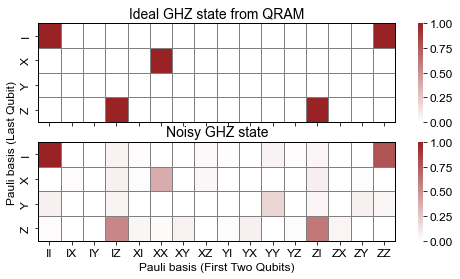

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 定义Pauli矩阵
I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
pauli = {'I': I, 'X': X, 'Y': Y, 'Z': Z}

# 设置子图标题
plt.rcParams['font.family'] = 'Arial'  # 设置字体为Times New Roman
plt.rcParams['font.size'] = 12  # 设置字号为12
# 生成张量积
def tensor_product(operators):
    result = operators[0]
    for op in operators[1:]:
        result = np.kron(result, op)
    return result

# 计算投影系数
def get_coefficient(rho, basis):
    n = 3  # 4比特
    pauli_op = tensor_product([pauli[b] for b in basis])
    coeff = np.trace(rho @ pauli_op).real  # 取实部
    return coeff

# 示例密度矩阵（随机生成）
rho_ideal = np.zeros((8, 8), dtype=complex)
rho_ideal[0, 0] = 0.5
rho_ideal[0, 7] = 0.5
rho_ideal[7, 0] = 0.5
rho_ideal[7, 7] = 0.5
rho 

labels = ['I', 'X', 'Y', 'Z']
# 定义X轴和Y轴的Pauli基组合
x_labels = [l1 + l2 for l1 in labels for l2 in labels]  # 前两比特
y_labels = [l1 for l1 in labels] # 后两比特


# 计算热力图数据
heatmap_data = np.zeros((4**1, 4**2))
for i, x_basis in enumerate(x_labels):
    for j, y_basis in enumerate(y_labels):
        # 组合成完整的4比特Pauli基
        full_basis = x_basis + y_basis  # 如 "IXYI", "XYYZ"
        heatmap_data[j, i] = get_coefficient(rho, full_basis)

heatmap_ideal = np.zeros((4**1, 4**2))
for i, x_basis in enumerate(x_labels):
    for j, y_basis in enumerate(y_labels):
        # 组合成完整的4比特Pauli基
        full_basis = x_basis + y_basis  # 如 "IXYI", "XYYZ"
        heatmap_ideal[j, i] = get_coefficient(rho_ideal, full_basis)
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', [ '#FFF','#992224',], N=256)
# 创建子图，上下排列
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 4),sharex=True)  # 设置图幅大小为8x12英寸
sns.heatmap(heatmap_data, annot=False, fmt='.2f', cmap=cmap, xticklabels=x_labels,  ax=axes[1], vmin=0, vmax=1,yticklabels=y_labels,linewidths=0.5, linecolor='gray')
sns.heatmap(heatmap_ideal, annot=False, fmt='.2f', cmap=cmap, xticklabels=x_labels,  ax=axes[0], vmin=0, vmax=1,yticklabels=y_labels,linewidths=0.5, linecolor='gray')

axes[1].set_title("Noisy GHZ state")
axes[0].set_title("Ideal GHZ state from QRAM")
axes[1].set_xlabel("Pauli basis (First Two Qubits)")
for ax in axes:
    for spine in ax.spines.values():
        spine.set_visible(True)  # 确保外边框可见
        spine.set_linewidth(1)   # 设置外边框粗细
        spine.set_color('black') # 设置外边框颜色
axes[1].set_ylabel("Pauli basis (Last Qubit)")
label = axes[1].yaxis.get_label()
label.set_position((0, 1))
plt.savefig("figs/noise_GHZ_tomo.svg")
plt.show()

## H gates

In [2]:
import pickle
from qiskit.circuit import CircuitInstruction
with open('level2_h/noisesim_qram.pkl', 'rb') as file:
    hdata = pickle.load(file)
hdata

[[{'address_sparse': 4,
   'data': array([1, 0, 0, 1]),
   'config': <qram.config.Config at 0x71cd50bd83d0>,
   'fidelity_init': 0.998001000332785,
   'fidelity_rho': 0.3044848762256178,
   'fidelity_router_0': 0.8161287245589643,
   'fidelity_router_1_0': 0.7400556317732333,
   'fidelity_router_1_1': 0.7626311538069919},
  {'address_sparse': 4,
   'data': array([1, 0, 0, 1]),
   'config': <qram.config.Config at 0x71cd642ed210>,
   'fidelity_init': 0.998001000332785,
   'fidelity_rho': 0.42134317933791005,
   'fidelity_router_0': 0.8793016238531713,
   'fidelity_router_1_0': 0.8200634720178396,
   'fidelity_router_1_1': 0.8386202293439698}],
 [{'address_sparse': 4,
   'data': array([0, 1, 1, 0]),
   'config': <qram.config.Config at 0x71cd642ee830>,
   'fidelity_init': 0.998001000332785,
   'fidelity_rho': 0.3018546574671146,
   'fidelity_router_0': 0.8161287245589641,
   'fidelity_router_1_0': 0.7400514632808596,
   'fidelity_router_1_1': 0.7626304609730463},
  {'address_sparse': 4,
  

In [3]:
from copy import deepcopy
import numpy as np
import pandas as pd
def list_to_dfH(data):
    configraw_df = []
    for rowidx,row in enumerate(data):
        new_row = deepcopy(row)
        new_row['data'] = ''.join(row['data'].astype(str))
        # new_row['address'] = ''.join(row['address'].astype(str))
        new_row['data_hammingweight'] = np.sum(row['data'])
        del new_row['config']
        configraw_df.append(new_row)

    configraw_df = pd.DataFrame(configraw_df)
    return configraw_df

In [4]:
configrawh = [d[0] for d in hdata]
configsubspaceh = [d[1] for d in hdata]
rawh_df = list_to_dfH(configrawh)
subspaceh = list_to_dfH(configsubspaceh)
rawh_df

,address_sparse,data,fidelity_init,fidelity_rho,fidelity_router_0,fidelity_router_1_0,fidelity_router_1_1,data_hammingweight
0,4,1001,0.998001,0.304485,0.816129,0.740056,0.762631,2
1,4,0110,0.998001,0.301855,0.816129,0.740051,0.762630,2
2,4,1011,0.998001,0.305075,0.814236,0.738493,0.759853,3
3,4,1100,0.998001,0.327016,0.816129,0.739331,0.763211,2
4,4,0011,0.998001,0.323899,0.816129,0.740710,0.761743,2
...,...,...,...,...,...,...,...,...
155,4,1011,0.998001,0.305075,0.814236,0.738493,0.759853,3
156,4,0101,0.998001,0.319369,0.818033,0.741727,0.764543,2
157,4,1011,0.998001,0.305075,0.814236,0.738493,0.759853,3
158,4,0011,0.998001,0.323899,0.816129,0.740710,0.761743,2


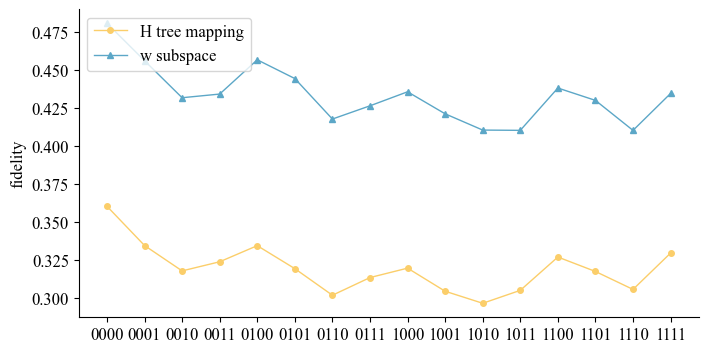

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.family'] = 'Times New Roman'  # 设置字体为Times New Roman
plt.rcParams['font.size'] = 12  # 设置字号为12
# plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
## set hatch density
plt.rcParams['hatch.linewidth'] = 0.6
plt.rcParams['hatch.color'] = 'black'
plt.rcParams['lines.linewidth'] = 1
## read the data

colors = ['#FBCE6A','#5CA7C7','#383838','#D4352D']
# hatchs = ['xxxx','','','+','//']
data_configspace = list_to_dfH(configsubspaceh).groupby(['data'])['fidelity_rho'].mean()
data_config = list_to_dfH(configrawh).groupby(['data'])['fidelity_rho'].mean()

x = np.arange(len(data_configspace))
markersize = 4
ax.plot(x, data_config, label='H tree mapping', marker='o', markersize=markersize, color=colors[0], linestyle='-')
ax.plot(x, data_configspace, label='w subspace', marker='^', markersize= markersize, color=colors[1], linestyle='-')
# ax.plot(x, data_configspacenol, label='w/o Data Load', marker='s', markersize=markersize, color=colors[2], linestyle='-')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_xlabel('QRAM Level')
ax.set_ylabel('fidelity')
ax.set_xticks(x)
ax.set_xticklabels([x for x in data_configspace.index.values])
# ax.set_yscale('log')
ax.legend(loc='upper left')
## hidden the top and right spines

# plt.savefig('two_level_qram_noise_fidelity.svg', bbox_inches='tight')

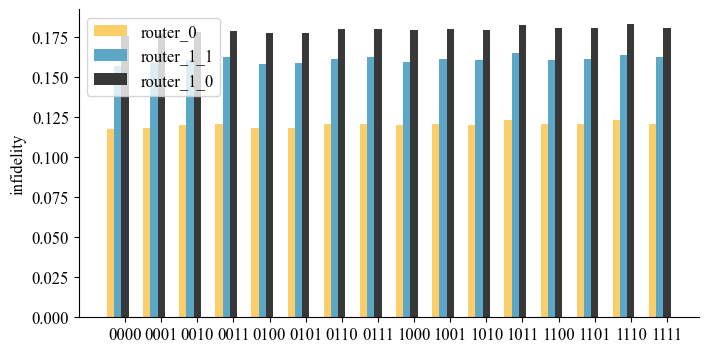

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.family'] = 'Times New Roman'  # 设置字体为Times New Roman
plt.rcParams['font.size'] = 12  # 设置字号为12
# plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
## set hatch density
plt.rcParams['hatch.linewidth'] = 0.6
plt.rcParams['hatch.color'] = 'black'
plt.rcParams['lines.linewidth'] = 1
## read the data

colors = ['#FBCE6A','#5CA7C7','#383838','#D4352D']
# hatchs = ['xxxx','','','+','//']
data = {}
names = ['router_0','router_1_1','router_1_0']
for name in names:
    data[name]= list_to_dfH(configsubspaceh).groupby(['data'])[f'fidelity_{name}'].mean()
# data_config = list_to_df(configraw).groupby(['address','data_hammingweight'])['fidelity_rho'].mean()

x = np.arange(len(data['router_0']))
markersize = 4
idx = 0
for name in names:
    # ax.plot(x, data[name], label=name, marker='^', markersize=markersize, color=colors[idx], linestyle='-')
    ax.bar(x-0.4+idx*0.2, 1-data[name],width=0.2, label=name, color=colors[idx], linestyle='-')
    idx+=1
# ax.plot(x, data_configspacenol, label='w/o Data Load', marker='s', markersize=markersize, color=colors[2], linestyle='-')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_xlabel('QRAM Level')
ax.set_ylabel('infidelity')
ax.set_xticks(x)
ax.set_xticklabels([x for x in data[name].index.values])
# ax.set_yscale('log')
ax.legend(loc='upper left')
## hidden the top and right spines


## 噪声注入水平 对 最后错误率的影响

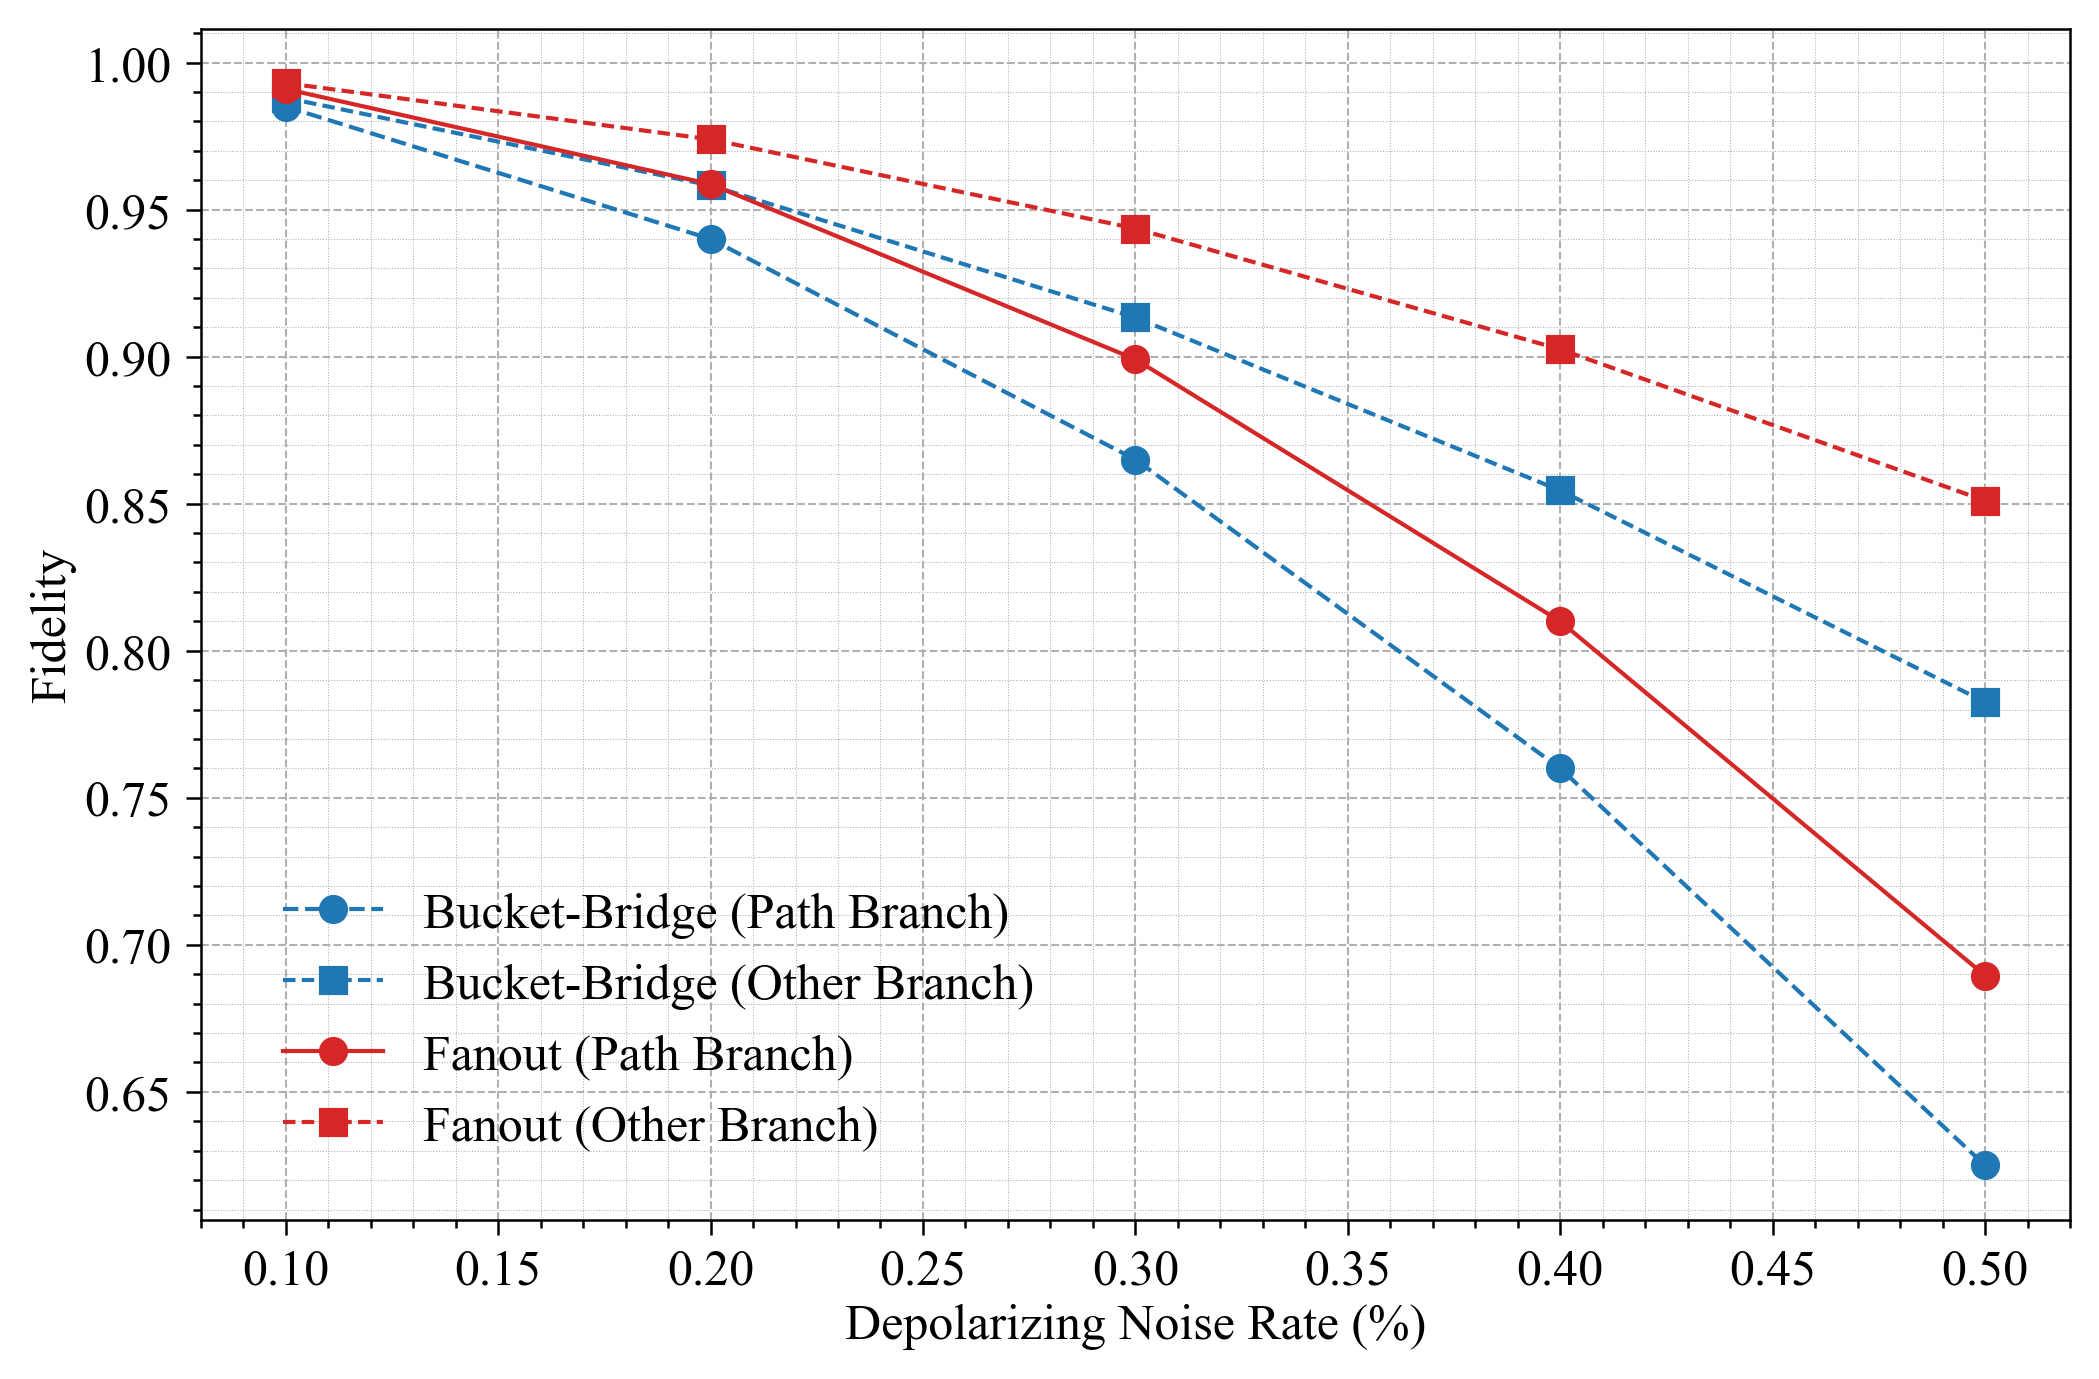

In [303]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Nature期刊格式设置
plt.rcParams.update({
    'font.size': 12,
    'font.sans-serif': 'Arial',
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'lines.markersize': 6,
    'lines.linewidth': 1.0,
    'axes.linewidth': 0.6,
    'xtick.major.width': 0.6,
    'ytick.major.width': 0.6,
    'figure.dpi': 300,
    'figure.figsize': (7.2, 4.8)  # 双栏尺寸：18cm → 7.2 inches
})

# 生成模拟数据
layers = np.arange(1, 6)
noise_levels = np.linspace(0.1, 0.5, 5)

# Bucket-Bridge架构数据
bb_fidelity_path = 1 - 0.15 * noise_levels * layers
bb_fidelity_other = 1 - 0.12 * noise_levels * (layers**0.8)

# Fanout架构数据
fanout_fidelity_path = 1 - 0.09 * noise_levels * (layers**1.2)
fanout_fidelity_other = 1 - 0.07 * noise_levels * (layers**0.9)

# 创建图表
fig, ax = plt.subplots()

# 绘制Bucket-Bridge曲线
ax.plot(noise_levels, bb_fidelity_path, 'o--', color='#1f77b4', 
        label='Bucket-Bridge (Path Branch)')
ax.plot(noise_levels, bb_fidelity_other, 's--', color='#1f77b4', 
        label='Bucket-Bridge (Other Branch)', dashes=(3,1.5))

# 绘制Fanout曲线
ax.plot(noise_levels, fanout_fidelity_path, 'o-', color='#d62728', 
        label='Fanout (Path Branch)')
ax.plot(noise_levels, fanout_fidelity_other, 's-', color='#d62728', 
        label='Fanout (Other Branch)', dashes=(3,1.5))

# 坐标轴和标签设置
ax.set_xlabel('Depolarizing Noise Rate (%)', labelpad=2)
ax.set_ylabel('Fidelity', labelpad=2)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

# 图例和网格
ax.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.02, 0.02))
ax.grid(True, which='major', linestyle='--', linewidth=0.5)
ax.grid(True, which='minor', linestyle=':', linewidth=0.25)

# 紧凑布局
plt.tight_layout(pad=1.2)
plt.savefig('qram_noise_comparison.pdf', bbox_inches='tight')  # 推荐PDF格式投稿
plt.show()

## 不同错误率对BB架构的影响

In [2]:
import pickle
from qiskit.circuit import CircuitInstruction
with open('level2_scale_noise/noisesim_qram.pkl', 'rb') as file:
    noise_data = pickle.load(file)
from functools import reduce
noise_data = reduce(lambda x, y: x+y, noise_data)
noise_data[0]

{'address_sparse': 2,
 'data': array([1, 0, 1, 0]),
 'decompose_mode': 'cswap_decompose',
 '1qerror_rate': 0.01,
 'fidelity_init': 0.9801,
 'fidelity_rho': 0.1253495435900743,
 'fidelity_router_0': 0.50499476732797,
 'fidelity_router_1_0': 0.5012096220571761,
 'fidelity_router_1_1': 0.5013318495421061}

In [13]:
import matplotlib.pyplot as plt
import numpy as np
noise_df = list_to_df(noise_data).groupby(['decompose_mode','1qerror_rate',])[f'fidelity_rho'].mean()


In [14]:
noise_df

decompose_mode      1qerror_rate
cswap_decompose     1.000000e-08    0.999989
                    1.000000e-07    0.999889
                    1.000000e-06    0.998870
                    1.000000e-05    0.988718
                    5.000000e-05    0.945191
                    1.000000e-04    0.894340
                    5.000000e-04    0.597547
                    1.000000e-03    0.396401
                    5.000000e-03    0.134877
                    1.000000e-02    0.125450
subspace_decompose  1.000000e-08    0.999992
                    1.000000e-07    0.999926
                    1.000000e-06    0.999252
                    1.000000e-05    0.992509
                    5.000000e-05    0.963218
                    1.000000e-04    0.928178
                    5.000000e-04    0.701370
                    1.000000e-03    0.514931
                    5.000000e-03    0.160525
                    1.000000e-02    0.129305
Name: fidelity_rho, dtype: float64

In [16]:
subspace_decompose_noise_df = noise_df[(noise_df.index.get_level_values('decompose_mode') == 'subspace_decompose' )]

In [18]:
subspace_decompose_noise_df.index.get_level_values('1qerror_rate') 

Index([1e-08, 1e-07, 1e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01], dtype='float64', name='1qerror_rate')

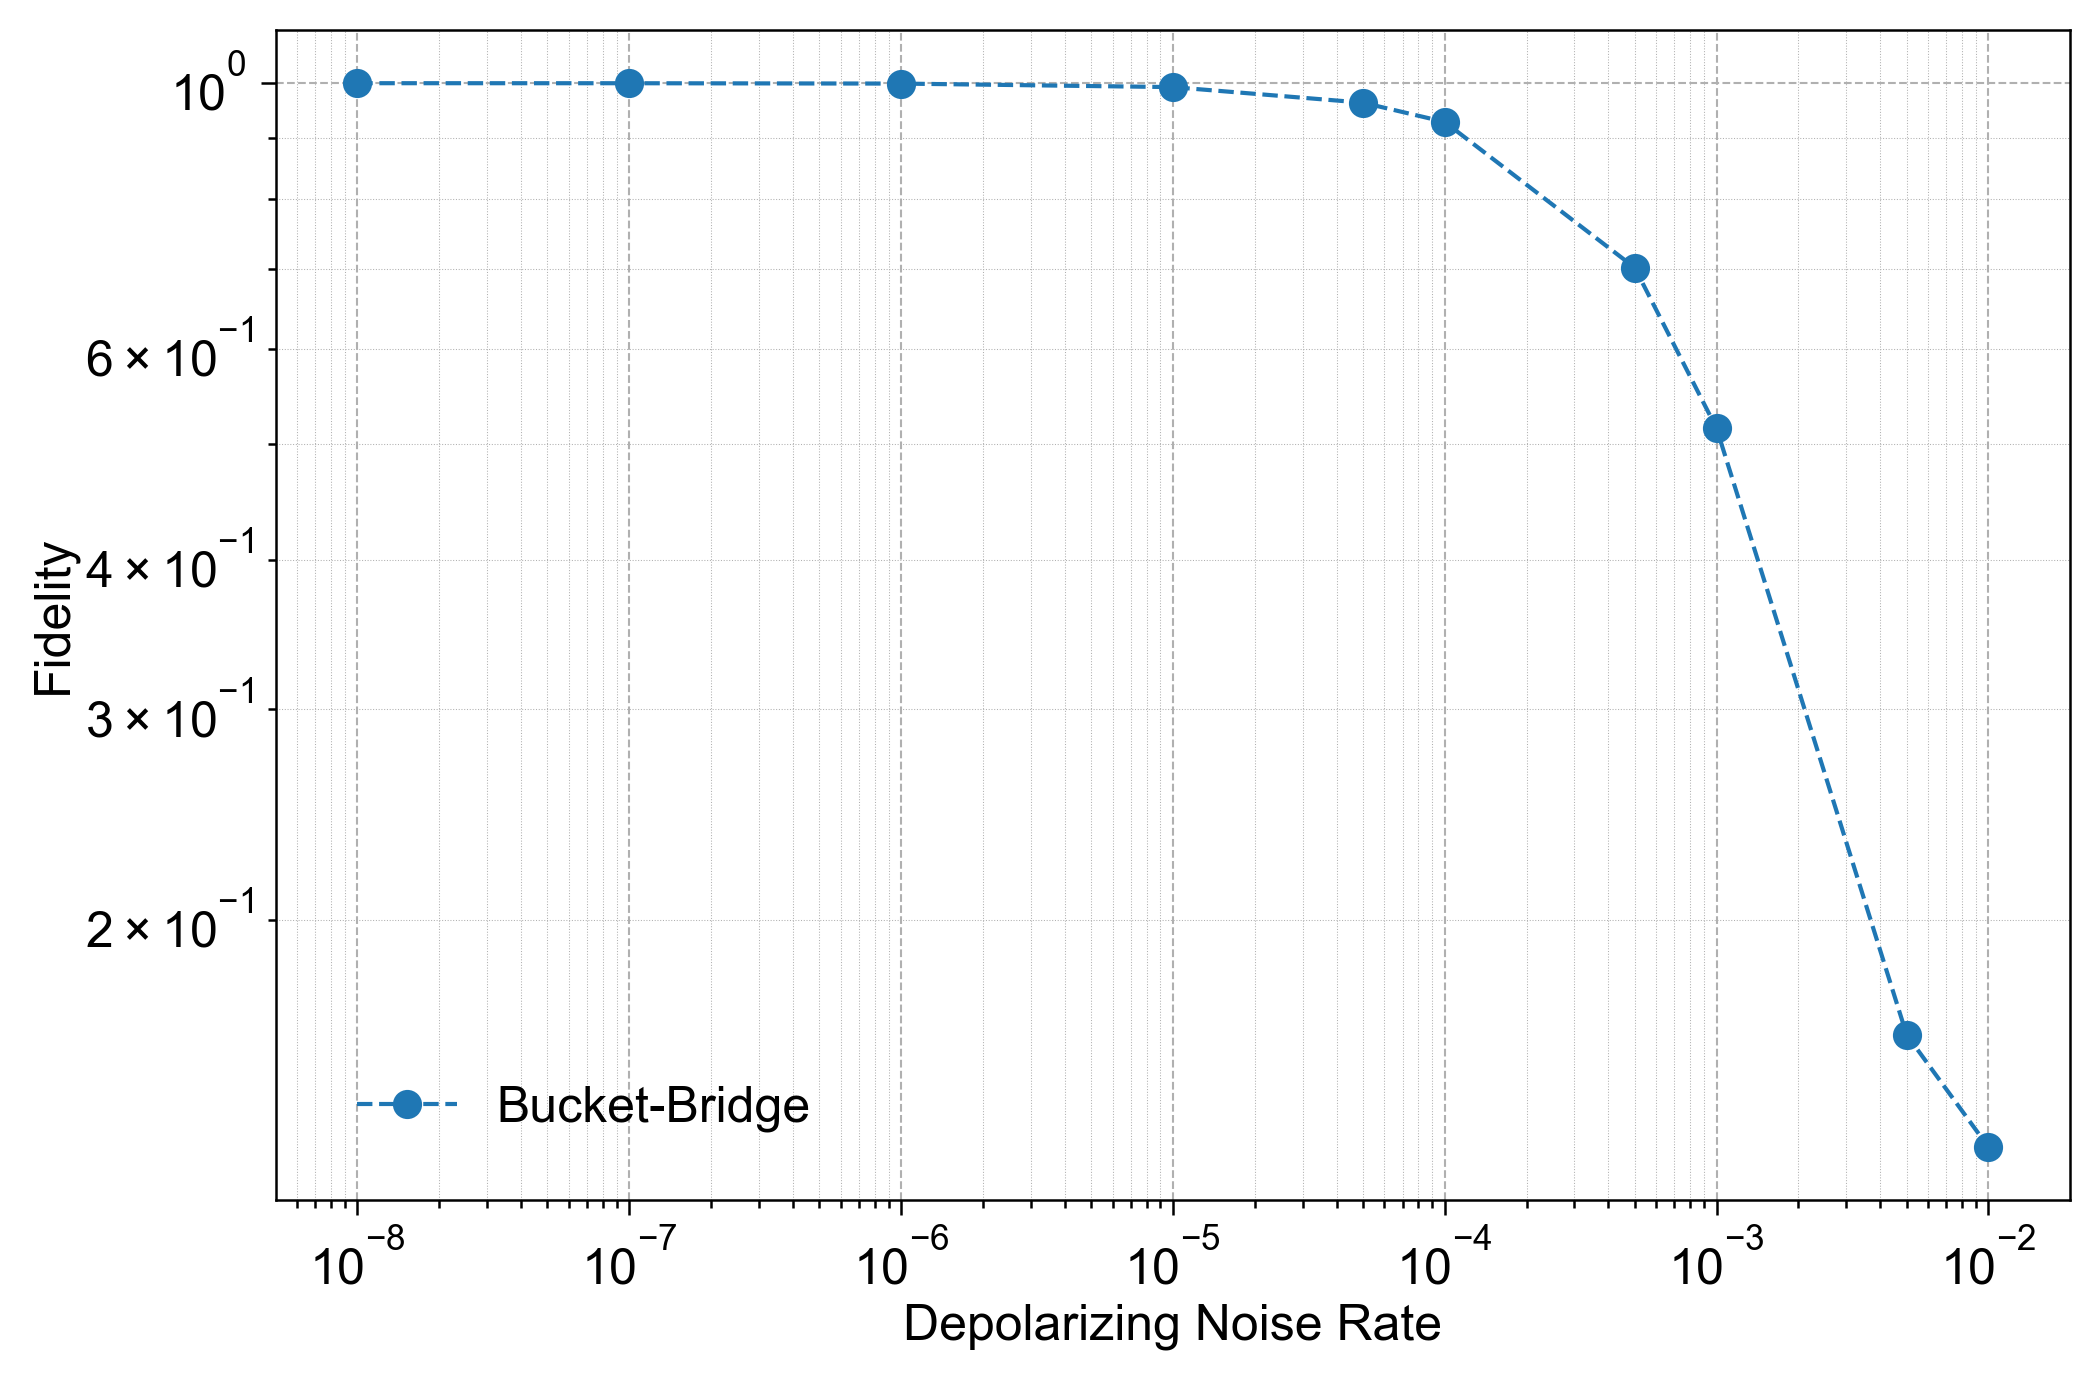

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Nature期刊格式设置
plt.rcParams.update({
    'font.size': 12,
    'font.sans-serif': 'Arial',
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'lines.markersize': 6,
    'lines.linewidth': 1.0,
    'axes.linewidth': 0.6,
    'xtick.major.width': 0.6,
    'ytick.major.width': 0.6,
    'figure.dpi': 300,
    'figure.figsize': (7.2, 4.8)  # 双栏尺寸：18cm → 7.2 inches
})

# 生成模拟数据
noise_levels = subspace_decompose_noise_df.index.get_level_values('1qerror_rate') 
bb_fidelity = subspace_decompose_noise_df

# 创建图表
fig, ax = plt.subplots()

# 绘制Bucket-Bridge曲线
ax.plot(noise_levels, bb_fidelity, 'o--', color='#1f77b4', 
        label='Bucket-Bridge')
# ax.plot(noise_levels, bb_fidelity_other, 's--', color='#1f77b4', 
#         label='Bucket-Bridge (Other Branch)', dashes=(3,1.5))

# # 绘制Fanout曲线
# ax.plot(noise_levels, fanout_fidelity_path, 'o-', color='#d62728', 
#         label='Fanout (Path Branch)')
# ax.plot(noise_levels, fanout_fidelity_other, 's-', color='#d62728', 
#         label='Fanout (Other Branch)', dashes=(3,1.5))

# 坐标轴和标签设置
ax.set_xlabel('Depolarizing Noise Rate', labelpad=2)
ax.set_ylabel('Fidelity', labelpad=2)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

# 图例和网格
ax.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.02, 0.02))
ax.grid(True, which='major', linestyle='--', linewidth=0.5)
ax.grid(True, which='minor', linestyle=':', linewidth=0.25)
ax.set_xscale('log')
ax.set_yscale('log')
# 紧凑布局
plt.tight_layout(pad=1.2)
plt.savefig('qram_noise_comparison.pdf', bbox_inches='tight')  # 推荐PDF格式投稿
plt.show()